In [1]:
#---------------------------------------------Importing required libraries------------------------------------------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [3]:
#------------------------------------------Function to display regression metrics-----------------------------------------------

In [4]:
def get_regression_metrics(y_true, y_pred):

    r2 = metrics.r2_score(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred) 

    print('R-squared:', round(r2, 4))
    print('MAE:', round(mae, 4))
    print('MSE:', round(mse, 4))
    print('RMSE:', round(np.sqrt(mse), 4))
    

In [5]:
#----------------------------------------Function for training and getting regression metrics-----------------------------------

In [6]:
def pred_model(model, X_train, X_test, y_train, y_test):
    
    # Training the model
    model = model.fit(X_train, y_train)
    
    train_R2 = []
    test_R2 = []
            
    # Getting R2-score of training set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train, y_pred_train)
    train_R2.append(round(R2_train_model, 4))
    
    # Getting R2-score of testing set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test, y_pred_test)
    test_R2.append(round(R2_test_model, 4))
    
    # Printing R2-scores
    print('R2-score of training set: ', round(R2_train_model, 4))
    print('R2-score of testing set: ', round(R2_test_model, 4))
    
    # Plotting Graphs 
    
    # Plotting Residual Plot of training data
    fig, ax = plt.subplots(1, 2, figsize = (10, 4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train), hist = False, ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    ax[0].set_ylabel('Residuals')
    
    # Plotting graph of y_test vs y_train
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()
    
    # Calling function to show the regression metrics
    get_regression_metrics(y_train, y_pred_train)


In [7]:
# Reading dataset for model1 
dataset_model1 = pd.read_csv("vehicle_data.csv")

In [8]:
# Display the current dimension of the dataset_model1
dataset_model1.shape

(301, 9)

In [9]:
# To know about basic statistical metrics
dataset_model1.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
# To check if there are any missing values in our dataset
dataset_model1.isna().count()

Car_Name         301
Year             301
Selling_Price    301
Present_Price    301
Kms_Driven       301
Fuel_Type        301
Seller_Type      301
Transmission     301
Owner            301
dtype: int64

In [11]:
dataset_model1.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
# Adding new column or variable 'Vehicle_Age' in our dataset which is the age of the vehicle
dataset_model1['Vehicle_Age'] = 2021 - dataset_model1['Year']

# As we have added 'Vehicle_Age', we have to drop 'Year' variable from our dataset
dataset_model1.drop('Year', axis = 1, inplace = True)

# Renaming columns in our dataset for better interpretation of the dataset
dataset_model1.rename(columns = {'Selling_Price':'Selling_Price(lacs)', 'Present_Price':'Present_Price(lacs)', 'Owner':'Num_PrevOwners'}, inplace = True)

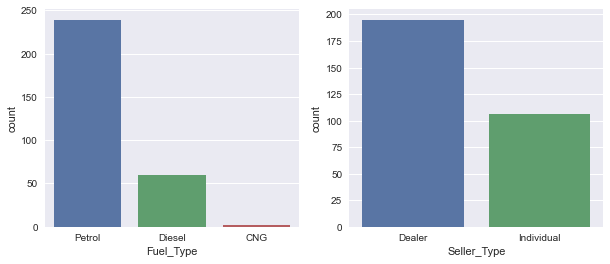

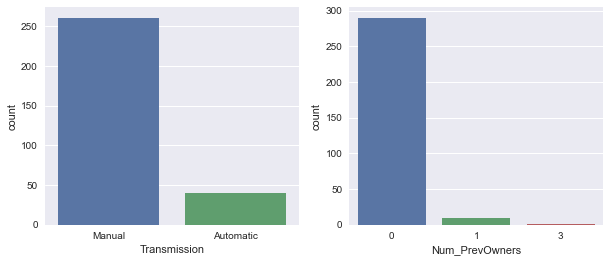

In [13]:
# Plotting histograms for all the available categorical variables to get a tentaive idea about their count in the dataset

categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Num_PrevOwners']

i = 0
while i < 4:
    fig = plt.figure(figsize = [10, 4])

    plt.subplot(1,2,1)
    sns.countplot(x = categorical_columns[i], data = dataset_model1)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x = categorical_columns[i], data = dataset_model1)
    i += 1
    
    plt.show()

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price(lacs)'>

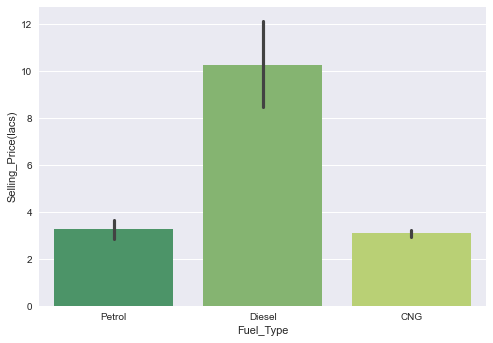

In [14]:
sns.barplot('Fuel_Type','Selling_Price(lacs)', data=dataset_model1,palette='summer')

<AxesSubplot:xlabel='Selling_Price(lacs)', ylabel='Present_Price(lacs)'>

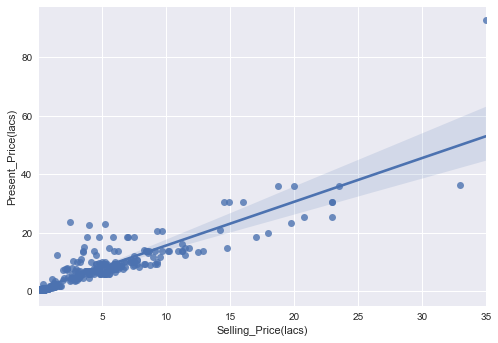

In [15]:
sns.regplot('Selling_Price(lacs)','Present_Price(lacs)',data = dataset_model1)

<AxesSubplot:xlabel='Selling_Price(lacs)', ylabel='Kms_Driven'>

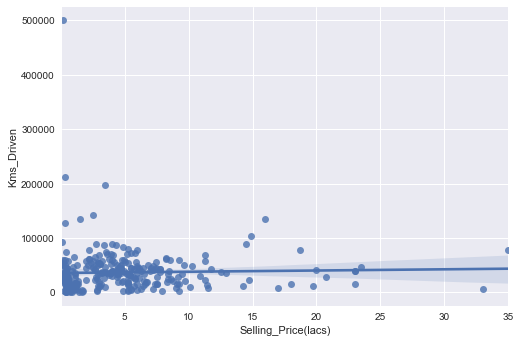

In [16]:
sns.regplot('Selling_Price(lacs)', 'Kms_Driven',data = dataset_model1)

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price(lacs)'>

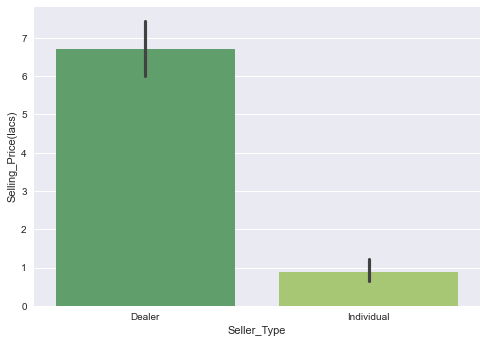

In [17]:
sns.barplot('Seller_Type','Selling_Price(lacs)',data=dataset_model1,palette='summer')

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price(lacs)'>

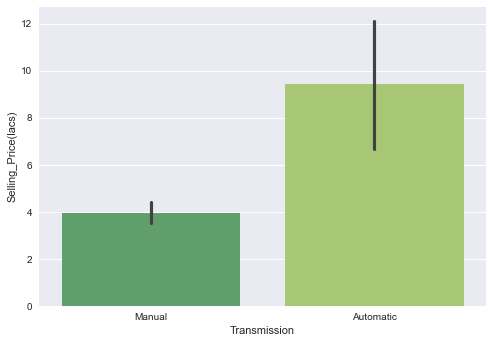

In [18]:
sns.barplot('Transmission','Selling_Price(lacs)',data=dataset_model1,palette='summer')

<AxesSubplot:xlabel='Num_PrevOwners', ylabel='Selling_Price(lacs)'>

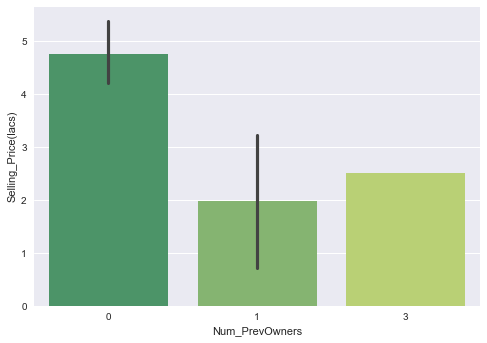

In [19]:
sns.barplot('Num_PrevOwners','Selling_Price(lacs)',data=dataset_model1,palette='summer')

<AxesSubplot:xlabel='Vehicle_Age', ylabel='Selling_Price(lacs)'>

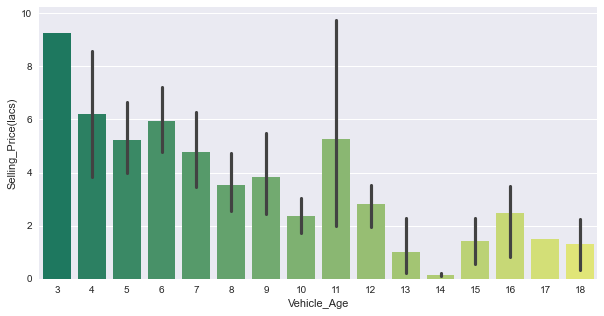

In [20]:
plt.figure(figsize=(10,5))
sns.barplot('Vehicle_Age','Selling_Price(lacs)',data=dataset_model1, palette='summer')

In [21]:
# Dropping 'Car_Name' because it doesn't add any value, we drop other categorical variables for Model-1 implementation
dataset_model1.drop(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], axis = 1, inplace = True)

In [22]:
# Separating dependent variable and its features
y1 = dataset_model1['Selling_Price(lacs)']

# Dropping 'Selling_Price(lacs) as it has to be predicted'
X1 = dataset_model1.drop('Selling_Price(lacs)', axis = 1)

# Performing the splitting of data into X1_train, X1_test, y1_train, y1_test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

R2-score of training set:  0.8579
R2-score of testing set:  0.821


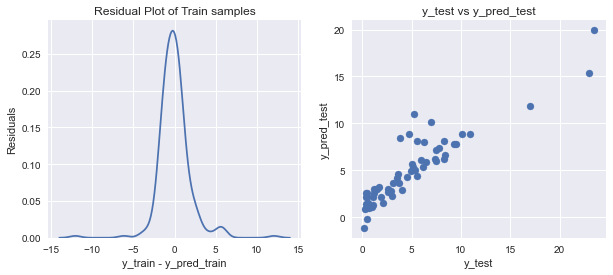

R-squared: 0.8579
MAE: 1.2353
MSE: 3.7566
RMSE: 1.9382


In [23]:
# Making an object from class LinearRegression
lm1 = LinearRegression()

# Calling function for training and metrics evaluation
pred_model(lm1, X1_train, X1_test, y1_train, y1_test)

Text(0.5, 0.98, 'Residual Analysis')

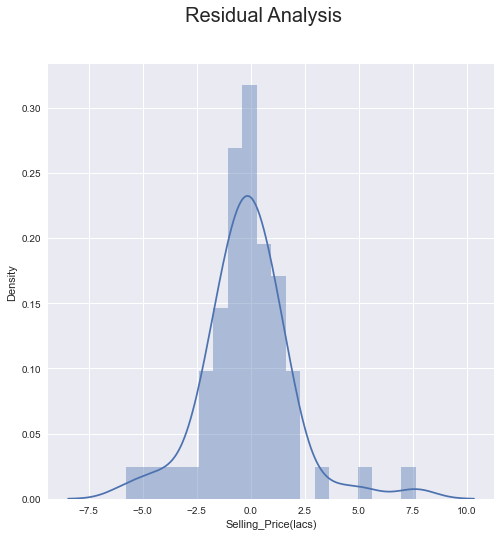

In [24]:
fig = plt.figure(figsize = (8, 8))
  
sns.distplot(y1_test - lm1.predict(X1_test), bins=20)

#Plot Residual Analysis
fig.suptitle('Residual Analysis', fontsize = 20)   

In [25]:
#-------------------------------------------------Using OLS on Model1-----------------------------------------------------------

In [26]:
# Appending column of all one for the constant intercept 'b0' in the Linear Regression Equation => y = b0 + b1*x1 + b2*x2 + ....
# Or simply, adding the intercept term or the bias term
X1 = np.append(arr = np.ones((301, 1)).astype(int), values = X1, axis = 1)

In [27]:
# At first we are using all the columns of X1 in X1_opt
X1_opt = X1[:, [0,1,2,3,4]]
X1_opt = np.array(X1_opt, dtype = float)

# Fitting the model
regressor_OLS = sm.OLS(y1, X1_opt).fit()

# Print the regression metrics
print(regressor_OLS.summary())

                             OLS Regression Results                            
Dep. Variable:     Selling_Price(lacs)   R-squared:                       0.852
Model:                             OLS   Adj. R-squared:                  0.850
Method:                  Least Squares   F-statistic:                     426.6
Date:                 Thu, 11 Mar 2021   Prob (F-statistic):          1.66e-121
Time:                         08:47:35   Log-Likelihood:                -628.25
No. Observations:                  301   AIC:                             1267.
Df Residuals:                      296   BIC:                             1285.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1753      0.332     12.56

In [28]:
# We are taking significance value = 0.05, any variable with P-value >= 0.05 will be dropped in consecutive steps
# We dropped 3rd column from the original X1 as its P-value is 0.718 > 0.05
X1_opt = X1[:, [0,1,3,4]]
X1_opt = np.array(X1_opt, dtype=float)

# Fitting the model
regressor_OLS = sm.OLS(y1, X1_opt).fit()

# Print the regression metrics
print(regressor_OLS.summary())

                             OLS Regression Results                            
Dep. Variable:     Selling_Price(lacs)   R-squared:                       0.852
Model:                             OLS   Adj. R-squared:                  0.851
Method:                  Least Squares   F-statistic:                     570.5
Date:                 Thu, 11 Mar 2021   Prob (F-statistic):          6.81e-123
Time:                         08:47:35   Log-Likelihood:                -628.32
No. Observations:                  301   AIC:                             1265.
Df Residuals:                      297   BIC:                             1279.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2011      0.324     12.96

In [29]:
# Reading dataset for model2
dataset_model2 = pd.read_csv("vehicle_data.csv")

In [30]:
# Display the current dimension of the dataset_model2
dataset_model2.shape

(301, 9)

In [31]:
# To know about basic statistical metrics
dataset_model2.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [32]:
# Adding new column or variable 'Vehicle_Age' in our dataset which is the age of the vehicle
dataset_model2['Vehicle_Age'] = 2021 - dataset_model2['Year']

# As we have added 'Vehicle_Age', we have to drop 'Year' variable from our dataset
dataset_model2.drop('Year', axis = 1, inplace = True)

# Renaming columns in our dataset for better interpretation of the dataset
dataset_model2.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Num_PrevOwners'},inplace = True)

In [33]:
# Dropping 'Car_Name' because it doesn't add any value
dataset_model2.drop(labels='Car_Name', axis =  1, inplace = True)

# Using Dummy Encoding for cateogrical variables
dataset_model2 = pd.get_dummies(data = dataset_model2, drop_first = True) 

In [34]:
# Separating target variable and its features
y2 = dataset_model2['Selling_Price(lacs)']

# Dropping 'Selling_Price(lacs) as it has to be predicted'
X2 = dataset_model2.drop('Selling_Price(lacs)', axis = 1)

# Performing the splitting of data into X2_train, X2_test, y2_train, y2_test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 1)

R2-score of training set:  0.8823
R2-score of testing set:  0.8625


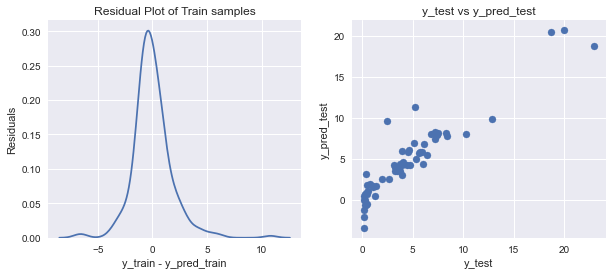

R-squared: 0.8823
MAE: 1.2072
MSE: 3.1519
RMSE: 1.7754


In [35]:
# Making an object from class LinearRegression
lm2 = LinearRegression()

# Calling function for training and metrics evaluation
pred_model(lm2, X2_train, X2_test, y2_train, y2_test)

Text(0.5, 0.98, 'Residual Analysis')

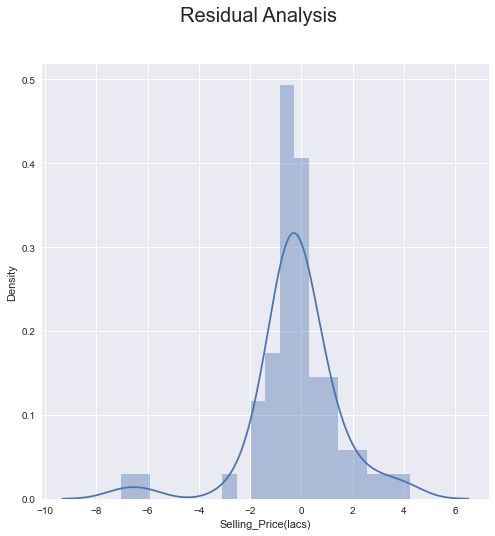

In [36]:
fig = plt.figure(figsize = (8, 8))
  
sns.distplot(y2_test - lm2.predict(X2_test), bins=20)

#Plot Residual Analysis
fig.suptitle('Residual Analysis', fontsize = 20)    

In [37]:
#-------------------------------------------------Using OLS on Model2-----------------------------------------------------------

In [38]:
# Appending column of all one for the constant intercept 'b0' in the Linear Regression Equation => y = b0 + b1*x1 + b2*x2 + ....
# Or simply, adding the intercept term or the bias term
X2 = np.append(arr = np.ones((301, 1)).astype(int), values = X2, axis = 1)

In [39]:
# At first we are using all the columns of X2 in X2_opt
X2_opt = X2[:, [0,1,2,3,4,5,6,7,8]]
X2_opt = np.array(X2_opt, dtype = float)

# Fitting the model
regressor_OLS = sm.OLS(y2, X2_opt).fit()

# Print the regression metrics
print(regressor_OLS.summary())

                             OLS Regression Results                            
Dep. Variable:     Selling_Price(lacs)   R-squared:                       0.883
Model:                             OLS   Adj. R-squared:                  0.879
Method:                  Least Squares   F-statistic:                     274.3
Date:                 Thu, 11 Mar 2021   Prob (F-statistic):          5.71e-131
Time:                         08:47:36   Log-Likelihood:                -593.62
No. Observations:                  301   AIC:                             1205.
Df Residuals:                      292   BIC:                             1239.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1882      1.330      3.90

In [40]:
# We are taking significance value = 0.05, any variable with P-value >= 0.05 will be dropped in consecutive steps
# We dropped 7th column from the original X2 as its P-value is 0.630 > 0.05
X2_opt = X2[:, [0,1,2,3,4,5,7,8]]
X2_opt = np.array(X2_opt, dtype = float)

# Fitting the model
regressor_OLS = sm.OLS(y2, X2_opt).fit()

# Print the regression metrics
print(regressor_OLS.summary())

                             OLS Regression Results                            
Dep. Variable:     Selling_Price(lacs)   R-squared:                       0.882
Model:                             OLS   Adj. R-squared:                  0.880
Method:                  Least Squares   F-statistic:                     314.3
Date:                 Thu, 11 Mar 2021   Prob (F-statistic):          3.49e-132
Time:                         08:47:36   Log-Likelihood:                -593.74
No. Observations:                  301   AIC:                             1203.
Df Residuals:                      293   BIC:                             1233.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7911      0.456     12.69

In [41]:
# We are taking significance value = 0.05, any variable with P-value >= 0.05 will be dropped in consecutive steps
# We dropped 4th column from the original X2 as its P-value is 0.112 > 0.05
X2_opt = X2[:, [0,1,2,4,5,7,8]]
X2_opt = np.array(X2_opt, dtype = float)

# Fitting the model
regressor_OLS = sm.OLS(y2, X2_opt).fit()

# Print the regression model
print(regressor_OLS.summary())

                             OLS Regression Results                            
Dep. Variable:     Selling_Price(lacs)   R-squared:                       0.881
Model:                             OLS   Adj. R-squared:                  0.879
Method:                  Least Squares   F-statistic:                     364.4
Date:                 Thu, 11 Mar 2021   Prob (F-statistic):          6.18e-133
Time:                         08:47:36   Log-Likelihood:                -595.04
No. Observations:                  301   AIC:                             1204.
Df Residuals:                      294   BIC:                             1230.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8468      0.456     12.81

In [42]:
#-----------------------------------------------Gradient Descent on Model1------------------------------------------------------

In [43]:
# Making scaler object from class StandardScaler
scaler = StandardScaler()

# Fitting our scaler on X1_train 
scaler = scaler.fit(X1_train)

# Standardizing the range of values
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

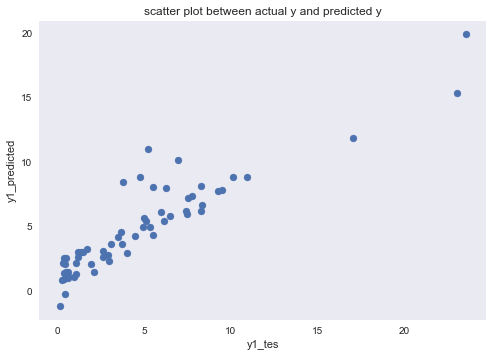

Value of R-squared : 0.8203
Value of Adjusted R-squared : 0.818
Value of Mean Squared Error : 4.1399
Value of Mean Absolute Error : 1.3993


In [44]:
# Making sgd_regressor object from SGDRegressor class
sgd_regressor = SGDRegressor()

sgd_regressor.fit(X1_train, y1_train)

plt.scatter(y1_test, sgd_regressor.predict(X1_test))
plt.grid()
plt.xlabel('y1_tes')
plt.ylabel('y1_predicted')
plt.title('scatter plot between actual y and predicted y')
plt.show()

r2 = metrics.r2_score(y1_test, sgd_regressor.predict(X1_test))
row, cols = X1_train.shape

# Calculating Adjusted R-Squared
adjusted_r2 = 1 - (1-r2)*(row-1)/(row-(cols - 1)-1)

# Print R-squared, Adjusted R-squared, MSE and MAE 
print('Value of R-squared :', round(r2, 4))
print('Value of Adjusted R-squared :', round(adjusted_r2, 4))
print('Value of Mean Squared Error :', round(mean_squared_error(y1_test, sgd_regressor.predict(X1_test)), 4))
print('Value of Mean Absolute Error :', round(mean_absolute_error(y1_test, sgd_regressor.predict(X1_test)), 4))


Text(0.5, 0.98, 'Residual Analysis')

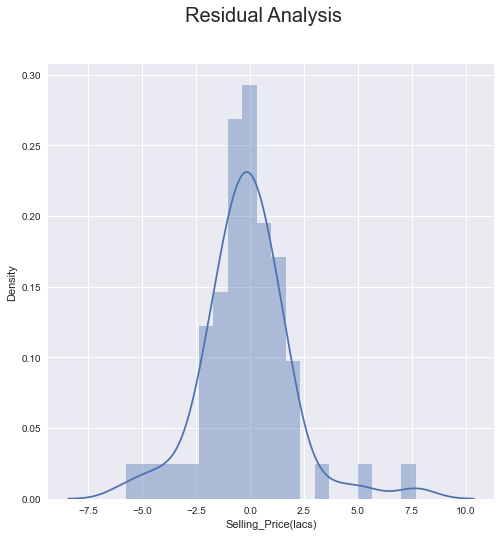

In [45]:
fig = plt.figure(figsize = (8, 8))
  
sns.distplot(y1_test -s gd_regressor.predict(X1_test), bins = 20)

#Plot Residual Analysis
fig.suptitle('Residual Analysis', fontsize = 20)    